# Abschnitt 1: ML Modelle

Erstellen Sie verschiedene ML (Standard) Modelle (aber keine Neuronalen Netzwerke)zur Bearbeitung
von gegebenen Datensätzen unter Berücksichtigung der folgenden Themengebiete:
- Datenmanagement
- Modelldesign
- Training
- Validierung & Performancebewertung


Prinzipiell soll gezeigt werden, wie mit den in der Vorlesung und Übung dargestellten Mitteln und
Methoden eine einfache ML Aufgabe gelöst werden kann.
Ziel ist es, möglichst gute ML Modelle für den gegebenen Datensatz zu finden (-> Parametrierung).
Jede Gruppe erhält einen individuellen Datensatz.
Es gelten folgende Rahmenbedingungen:
- Die Programmiersprache ist Python.
- Abgabe als Datei im Python Notebook Format (.ipynb).
- Der zu bearbeitende Datensatz muss automatisch heruntergeladen und verarbeitet werden.
- Das Skript muss ohne Fehler in einer Google Colab Umgebung durchlaufen (evtl. auftretende
Warnungen sind zulässig).
- Der Quelltext muss sinnvoll dokumentiert sein.
- Dokumentation und Erläuterungen sind im Python Notebook zu erstellen.
- Es muss angegeben werden um welchen Typ von ML Aufgabe es sich handelt.
- Es wird empfohlen die aus der Vorlesung bekannten Frameworks und Bibliotheken zu
verwenden.
- Es müssen zwei verschiedene ML Modelle entworfen, trainiert und validiert werden.
- Dabei sind Performancewerte zu erheben.
- Zu jedem Modell ist eine kurze Erklärung zu geben, warum man sich für dieses Modell
entschieden hat.
- Es müssen sinnvolle und aussagekräftige Performanceindikatoren gewählt werden (inkl.
Begründung).

In [0]:
#Wichtige imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [0]:
url = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")


#Zipfile wird heruntergeladen und in ein DataFrame gepackt
zipfile = ZipFile(BytesIO(url.read()))
df = pd.read_csv(zipfile.open('bank-additional/bank-additional-full.csv'), sep=";")

#Set anzeigen
df.head()

## Datenmanagement

In [0]:
#Überblick verschaffen
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [0]:
#Auf null-values überprüfen
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [0]:
#Häufigkeiten der Werte von y ausgeben
#Es handelt sich um einen unbalancierten Datensatz
print(df['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [0]:
#Häufigkeiten der Werte in der Spalte 'default' ausgeben
print(df['default'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [0]:
#Die gesamte Spalte "default" ist nicht aussagekräftig, da wir den Wert 'unknown' zum dem Wert ändern würden, der am häufigsten vorkommt. 
#Dann würde jedoch die gesamte Spalte fast ausschließlich aus 'no' bestehen. Daher wird die Spalte 'default' komplett gelöscht.
del df['default']

In [0]:
#Die Spalte 'pdays' beschreibt die Anzahl der Tage, die verstrichen sind, nachdem der Kunde zuletzt von einer früheren Kampagne kontaktiert wurde.
#Die Werte sind numerisch - 999 bedeutet, dass der Kunde zuvor nicht kontaktiert wurde

#Häufigkeiten der Werte ausgeben
print(df['pdays'].value_counts())

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


In [0]:
#Über 39000 der ca. 41000 Kunden wurden zuvor noch nie kontaktiert. Zudem ist der numerische Wert 999 ist für die Vorhersage ungeeignet.
#Daher entscheiden wir uns dafür, die Spalte komplett zu entfernen.
del df['pdays']

In [0]:
print(df['housing'].value_counts())

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


In [0]:
#Noch auf faire Verteilung ändern wenn es Zeit dafür gibt
df['housing'].replace(to_replace="unknown", value="yes", inplace=True)
print(df['housing'].value_counts())

yes    22566
no     18622
Name: housing, dtype: int64


In [0]:
df['y'] = df['y'].replace(['no'], 0)
df['y'] = df['y'].replace(['yes'], 1)

# Korrelationen überprüfen
corr = df.corr()
corr

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
previous,0.024365,0.020640,-0.079141,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,0.405274,-0.066357,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


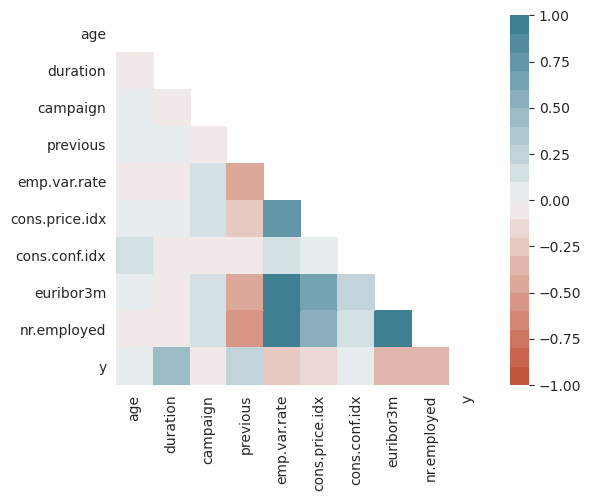

In [0]:
import seaborn as sns

#Korrelationen auf Heatmap anzeigen
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=20), mask=mask, vmax=1, vmin=-1, square=True)

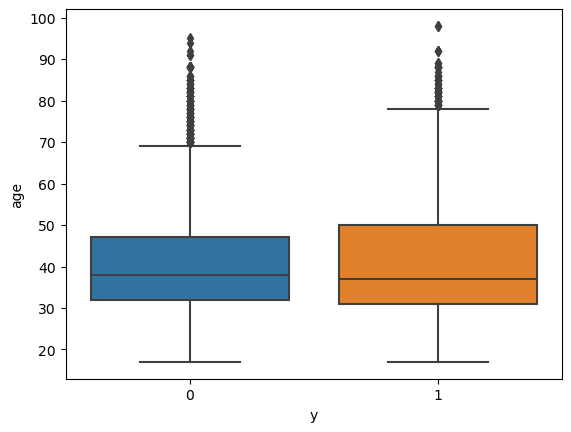

In [0]:
sns.boxplot(data=df, x="y", y="age")

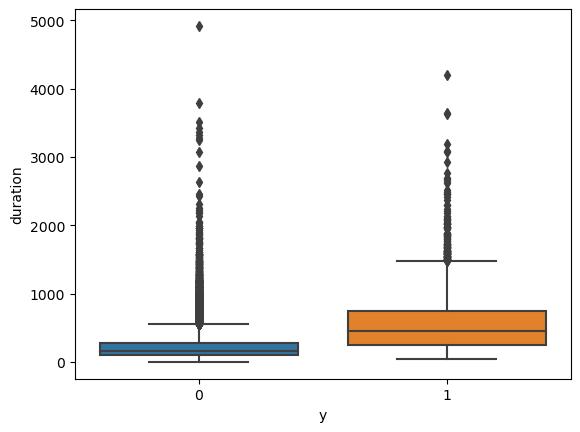

In [0]:
sns.boxplot(data=df, x="y", y="duration")

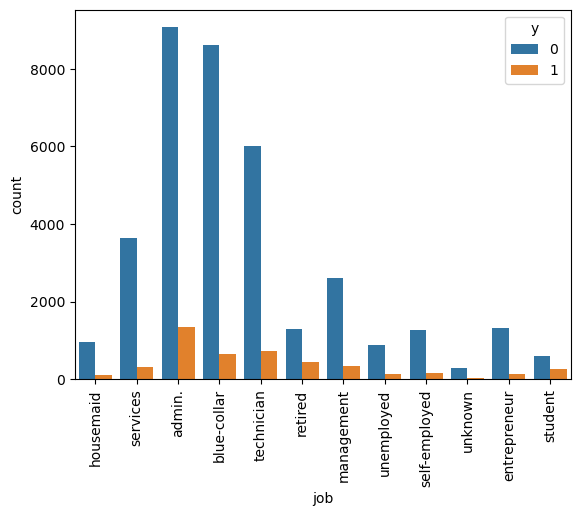

In [0]:
sns.countplot(data=df, x="job", hue="y")
plt.xticks(rotation=90)
plt.show()

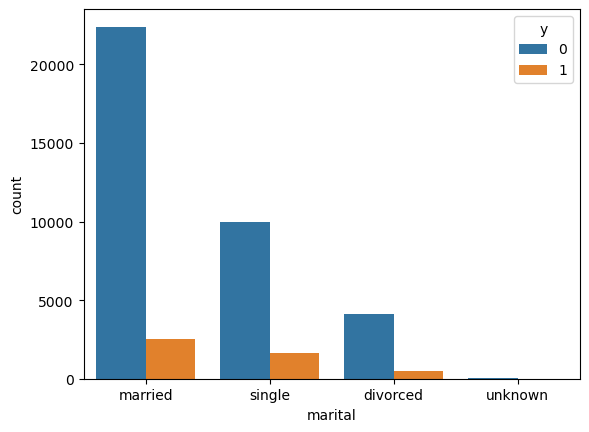

In [0]:
sns.countplot(data=df, x="marital", hue="y")

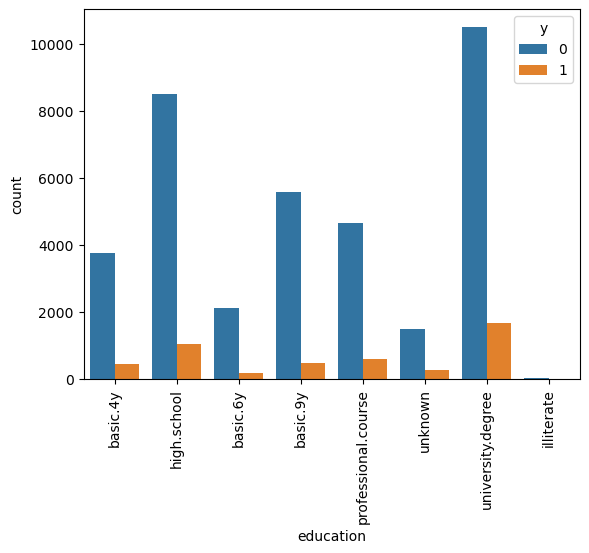

In [0]:
sns.countplot(data=df, x="education", hue="y")
plt.xticks(rotation=90)
plt.show()

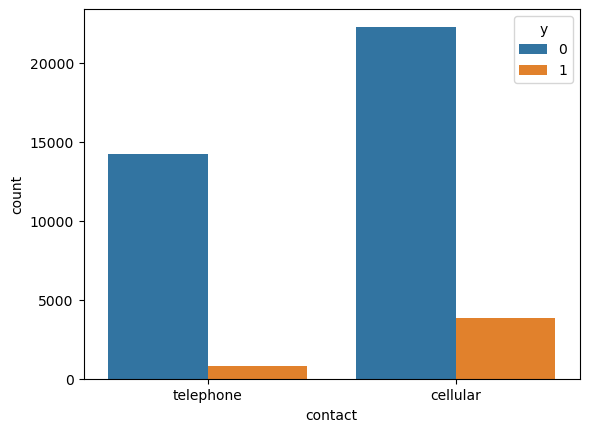

In [0]:
sns.countplot(data=df, x="contact", hue="y")

In [0]:
# Daten in Input und Output unterteilen (data(X) und target(y))

X = df.drop(columns=['y'])
y = df["y"]

# https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
# Die kategorischen Features (z.B. job, marital, ...) müssen zu Zahlen konvertiert werden

X = pd.get_dummies(data=X)

In [0]:
print(X.shape)
print(y.shape)

(41188, 58)
(41188,)


In [0]:
# Aufteilung der Daten in Training und Test

from sklearn.model_selection import train_test_split

# Testdaten sind 20%, Trainingsdaten sind 80% der Gesamtdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

# Führe die Skalierung durch 1) Trainingsdaten & 2) Anwendungsdaten (unbekannte Daten)
#X_scaled = scaler.transform(X_train)
#X_unknown_scaled = scaler.transform(X_test) # Transformation gemäß den Trainingsdaten

In [0]:
#Prüfen der Dimensionen

print("Größe der Trainingsdaten:\t", X_train.shape,"\t==>\t",y_train.shape)
print("Größe der Testdaten:\t\t", X_test.shape,"\t==>\t",y_test.shape)
print("Größe aller Daten:\t\t", X.shape,"\t==>\t",y.shape)

Größe der Trainingsdaten:	 (32950, 58) 	==>	 (32950,)
Größe der Testdaten:		 (8238, 58) 	==>	 (8238,)
Größe aller Daten:		 (41188, 58) 	==>	 (41188,)


## Modelldesign, Training und Validierung

In [0]:
# Bibliotheken für Performanceindikatoren
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

def calculate_performance_metrics(y_test, y_pred):
    # Performanceindikatoren berechnen und ausgeben
    my_accuracy_score = accuracy_score(y_test,y_pred)
    my_precision_score = precision_score(y_test, y_pred)
    my_f1_score = f1_score(y_test, y_pred)
    my_recall_score = recall_score(y_test, y_pred)
    print("Test Performance Metrics:")
    print("Accuracy: %0.2f" % my_accuracy_score)
    print("Precision: %0.2f" % my_precision_score)
    print("F1-Score: %0.2f" % my_f1_score)
    print("Recall: %0.2f" % my_recall_score)
    print("----------------")
    return my_accuracy_score, my_precision_score, my_f1_score, my_recall_score


def calculate_performance_metrics_train(y_train, y_pred_train):
    # Performanceindikatoren berechnen und ausgeben
    my_accuracy_score = accuracy_score(y_train,y_pred_train)
    my_precision_score = precision_score(y_train, y_pred_train)
    my_f1_score = f1_score(y_train, y_pred_train)
    my_recall_score = recall_score(y_train, y_pred_train)
    print("Training Performance Metrics:")
    print("Accuracy: %0.2f" % my_accuracy_score)
    print("Precision: %0.2f" % my_precision_score)
    print("F1-Score: %0.2f" % my_f1_score)
    print("Recall: %0.2f" % my_recall_score)
    print("----------------")
    return my_accuracy_score, my_precision_score, my_f1_score, my_recall_score

### Modell: Lineare Regression

Die lineare Regression ist für diesen Datensatz nicht geeignet, da beim vorhandenen Datensatz eine Klassifikation angewendet werden sollte, diese aber durch lineare Regression nicht möglich ist. Mit der linearen Regression werden numerische Werte berechnet.

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

def grid_search_wrapper(clf ,refit_score, param_grid, scorers):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    print("Starting Grid search...")
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    # print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    # print(pd.DataFrame(confusion_matrix(y_test, y_pred),
    #              columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

### Modell: Gaussian Naive Bayes

Gaussian Naive Bayes hat etwas mit bedingter Wahrscheinlichkeit zu tun. Naive Bayes wird deswegen als naiv bezeichnet, weil davon ausgegangen wird, dass alle Parameter unabhängig voneinander sind. Dies macht für unser Beispiel jedoch nur bedingt Sinn. Beim Gaussian Naive Bayes werden die Wahrscheinlichkeiten unter der Gauss-Verteilung betrachtet

In [0]:
# Lade Bibliothek
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

param_grid = {
    'priors': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'var_smoothing' : [0.0000000001, 0.000000001, 0.00000001, 0.0000001]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

#nb_grid = grid_search_wrapper(nb_clf, 'recall_score')


# Trainiere
nb_clf.fit(X_train, y_train)

# Vorhersage mit Trainingsdaten
y_pred_nb_train = nb_clf.predict(X_train)

# Vorhersage mit Testdaten
y_prediction_nb = nb_clf.predict(X_test)

# Analysiere
#print("Anzahl der falsch zugeordneten Klassen: %d (bei %d Datensätze)" % ((y_test != y_prediction_nb).sum(), X_test.shape[0]))

accuracy_score_nb_train, precision_score_nb_train, f1_score_nb_train, recall_score_nb_train = calculate_performance_metrics_train(y_train, y_pred_nb_train)

accuracy_score_nb, precision_score_nb, f1_score_nb, recall_score_nb = calculate_performance_metrics(y_test, y_prediction_nb)

scores = cross_val_score(nb_clf, X_train, y_train, cv=5, scoring='recall')

print("Average recall score: ", scores.mean())

Training Performance Metrics:
Accuracy: 0.86
Precision: 0.41
F1-Score: 0.46
Recall: 0.53
----------------
Test Performance Metrics:
Accuracy: 0.86
Precision: 0.42
F1-Score: 0.46
Recall: 0.50
----------------
Average recall score:  0.5302693055350302


### Modell: SGDClassifier

Stochastic Gradient Descent ist dann von Bedeutung, wenn Redundanzen (Cluster) in den Daten auftreten. Sehr stark wenn es viele Daten mit vielen Parametern gibt

In [0]:
# Lade Bibliothek
from sklearn.linear_model import SGDClassifier

# Erstelle Instanz
sgd_class = SGDClassifier(loss="hinge")

# Training
sgd_class.fit(X_train, y_train)

# Vorhersage mit Trainingsdaten
y_pred_sgd_train = sgd_class.predict(X_train)

# Vorhersage
y_prediction_sgd = sgd_class.predict(X_test)

# Analysiere
# print("Anzahl der falsch zugeordneten Klassen: %d (bei %d Datensätze)" % ((y_test != y_prediction_sgd).sum(), X_test.shape[0]))

accuracy_score_sgd_train, precision_score_sgd_train, f1_score_sgd_train, recall_score_sgd_train = calculate_performance_metrics_train(y_train, y_pred_sgd_train)

accuracy_score_sgd, precision_score_sgd, f1_score_sgd, recall_score_sgd = calculate_performance_metrics(y_test, y_prediction_sgd)

scores = cross_val_score(sgd_class, X_train, y_train, cv=5, scoring='recall')

print("Average recall score: ", scores.mean())

Training Performance Metrics:
Accuracy: 0.89
Precision: 0.64
F1-Score: 0.18
Recall: 0.10
----------------
Test Performance Metrics:
Accuracy: 0.88
Precision: 0.64
F1-Score: 0.20
Recall: 0.12
----------------
Average recall score:  0.44444166562460924


### Modell: Logistische Regression

Logistische Regression sagt vorher, ob etwas wahr oder falsch ist. -> sehr passend für unseren Anwendungsfall.
Ist dann Anwendbar, wenn die Regressoren keine hohe Multikollinearität aufweisen. 

In [0]:
# Lade Bibliothek
from sklearn.linear_model import LogisticRegression

# Erstelle Instanz -> max_iter begründen
log_reg = LogisticRegression(max_iter=5000)

# Trainiere
log_reg.fit(X_train,y_train)

# Vorhersage auf Trainingsdaten
y_pred_log_train = log_reg.predict(X_train)

# Vorhersage auf Validierungsdaten
y_pred_log = log_reg.predict(X_test)

# Analysiere gelernte Parameter
b = log_reg.intercept_
w = log_reg.coef_

accuracy_score_log_train, precision_score_log_train, f1_score_log_train, recall_score_log_train = calculate_performance_metrics_train(y_train, y_pred_log_train)

accuracy_score_log, precision_score_log, f1_score_log, recall_score_log = calculate_performance_metrics(y_test, y_pred_log)

scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='recall')

print("Average recall score: ", scores.mean())

Training Performance Metrics:
Accuracy: 0.91
Precision: 0.68
F1-Score: 0.51
Recall: 0.41
----------------
Test Performance Metrics:
Accuracy: 0.90
Precision: 0.66
F1-Score: 0.48
Recall: 0.38
----------------
Average recall score:  0.4127748663324504


In [0]:
# Lade Bibliothek
from sklearn.ensemble import RandomForestClassifier

# Erstelle Instanz
rf = RandomForestClassifier()

# Trainiere
rf.fit(X_train, y_train)

# Vorhersage auf Trainingsdaten
y_pred_rf_train = rf.predict(X_train)

# Vorhersage auf Validierungsdaten
y_pred_rf = rf.predict(X_test)

# Performancemetriken berechnen
accuracy_score_rf_train, precision_score_rf_train, f1_score_rf_train, recall_score_rf_train = calculate_performance_metrics_train(y_train, y_pred_rf_train)

accuracy_score_rf, precision_score_rf, f1_score_rf, recall_score_rf = calculate_performance_metrics(y_test, y_pred_rf)

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')

print("Average recall score: ", scores.mean())

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_rf = grid_search_wrapper(rf, 'recall_score', param_grid, scorers)

Training Performance Metrics:
Accuracy: 1.00
Precision: 1.00
F1-Score: 1.00
Recall: 1.00
----------------
Test Performance Metrics:
Accuracy: 0.92
Precision: 0.68
F1-Score: 0.57
Recall: 0.49
----------------
Average recall score:  0.4532819053871685


## Performancebewertung:

### Confusion Matrix

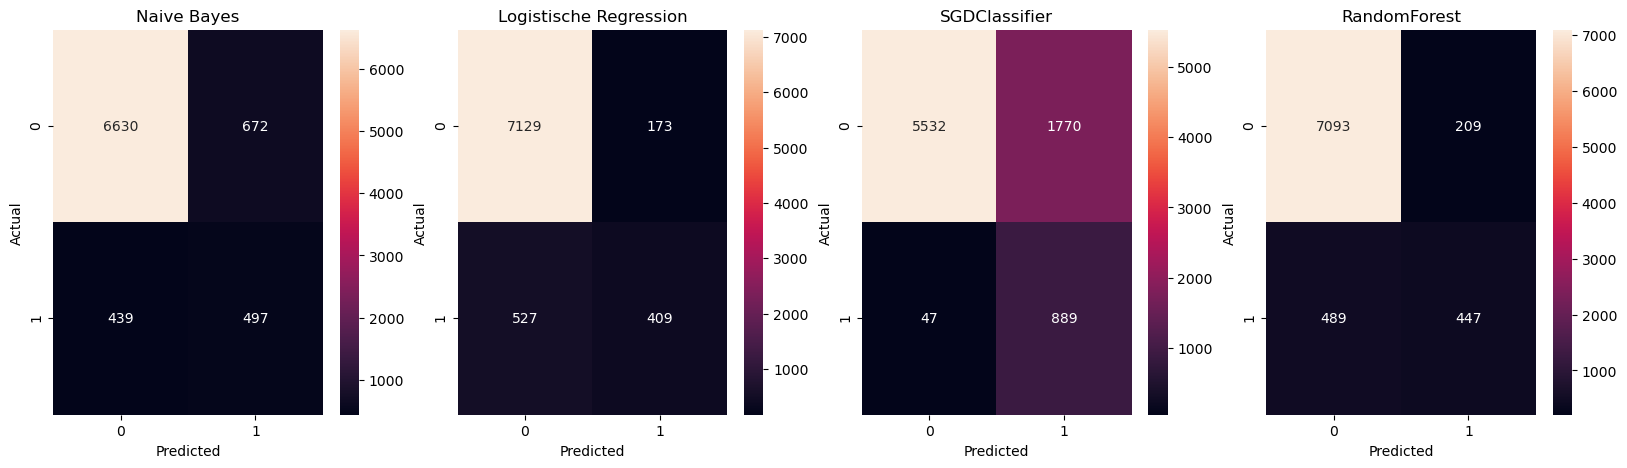

In [0]:
# Subplots initialisieren
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))

# Confusion Matrix erstellen
confusion_matrix_nb = pd.crosstab(y_test, y_prediction_nb, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_log = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_sgd = pd.crosstab(y_test, y_prediction_sgd, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])

# In Heatmap anzeigen
sns.heatmap(confusion_matrix_nb, annot=True, fmt="d", ax=ax1)
sns.heatmap(confusion_matrix_log, annot=True, fmt="d", ax=ax2)
sns.heatmap(confusion_matrix_sgd, annot=True, fmt="d", ax=ax3)
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", ax=ax4)

# Titel für Subplots
ax1.title.set_text("Naive Bayes")
ax2.title.set_text("Logistische Regression")
ax3.title.set_text("SGDClassifier")
ax4.title.set_text("RandomForest")

plt.show()

Die Anzahl der false negatives ist in diesem Modell ziemlich hoch. Das bedeutet, wenn die Bank nur die Kunden anruft, bei denen das Modell 1 vorhersagt, gehen viele potentielle Kunden (falsch negative) verloren. Deswegen ist es bei dieser Aufgabe besonders wichtig, einen hohen Recall-Wert zu erhalten. Es ist in diesem Fall nicht so schlimm, mehr false positives zu erhalten, da diese zwar einen extra Anruf kosten, aber dadurch keine potetiellen Kunden verloren werden.

### Accuracy, Precision, Recall, F-Score

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

Die Precision ist sinnvoll, wenn die Kosten für falsch-positive hoch sind, da sie als Maß für die korrekt positiven vorhergesagten Fälle aus allen positiven Fällen herangezogen wird. Sie ergibt sich aus: (TP) / (TP + FP).

Der Recall wird wichtig, sobald die Kosten für falsch-negative hoch sind. Der Wert ergibt sich durch die korrekt vorhergesagten positiven Fälle aus allen tatsächlich positiven Fällen. Er ergibt sich aus: (TP) / (TP + FN).

Die Accuracy steht für alle korrekt identifizierten Fälle. Sie wird verwendet, wenn alle Klassen gleich wichtig sind. Sie ergibt sich aus: (TP + TN) / (TP + FP + TN + FN).

Der F1-score ist das harmonische Mittel aus Precision und Recall und gibt ein besseres Maß für die falsch klassifizierten Fälle als die Accuracy an. Er ergibt sich aus: 2 * (Precision * Recall) / (Precision + Recall) 

In [0]:
# Recall Werte
print("[Recall] Training:\t", recall_score(y_train, y_pred_log_train))
print("[Recall] Test:\t\t", recall_score(y_test, y_pred_log))

[Recall] Training:	 0.3928185745140389
[Recall] Test:		 0.43696581196581197


In [0]:
# Precision Werte
print("[Precision] Trainingsdaten:\t", precision_score(y_train, y_pred_log_train))
print("[Precision] Testdaten:\t\t", precision_score(y_test, y_pred_log))

[Precision] Trainingsdaten:	 0.6637773722627737
[Precision] Testdaten:		 0.7027491408934707
